In [58]:
#Liangco, Ma. Karizza F.
#COE005 - HW1

#We were required to utilize tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
#Importing Gathered Data
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [60]:
#Preparing the Gathered Data
#Dropping Irrelevant and Empty Columns

data = df.copy()
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

#Renaming Columns to avoid confusion

data = data.rename(columns={"v1":"label", "v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
#Creating Binary Representation, ham as 0 and spam as 1

data['label']=data['label'].map({'ham':0,'spam':1})
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


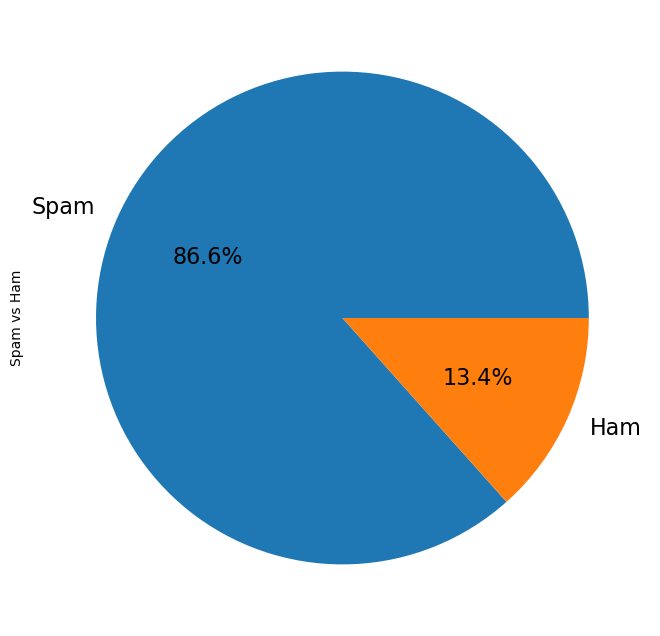

In [62]:
#Displaying Prepared Data for Visualization

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.v1.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Spam", "Ham"],
                                           ylabel="Spam vs Ham",
                                           autopct='%1.1f%%');

In [63]:
#Dividing data into training and testing, 80% Training and 20% Testing

sentences = data['text'].tolist()
labels = data['label'].tolist()

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#Creation of Labels into Numpy Arrays
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [64]:
#Breaking down of the Data to Tokens

vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [65]:
#Making sure that the padded sequence is working properly

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [66]:
#Choosing and Creation of Model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#I chose Adam as Optimizer 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 6)                 9606      
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
140/140 [==============================] - 1s 4ms/step - loss: 0.3552 - accuracy: 0.8593 - val_loss: 0.2004 - val_accuracy: 0.8700
Epoch 2/50
140/140 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9013 - val_loss: 0.1467 - val_accuracy: 0.9713
Epoch 3/50
140/140 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9726 - val_loss: 0.1318 - val_accuracy: 0.9803
Epoch 4/50
140/140 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9816 - val_loss: 0.1185 - val_accuracy: 0.9830
Epoch 5/50
140/140 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9863 - val_loss: 0.1111 - val_accuracy: 0.9839
Epoch 6/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9895 - val_loss: 0.1058 - val_accuracy: 0.9848
Epoch 7/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9908 - val_loss: 0.0615 - val_accuracy: 0.9848
Epoch 

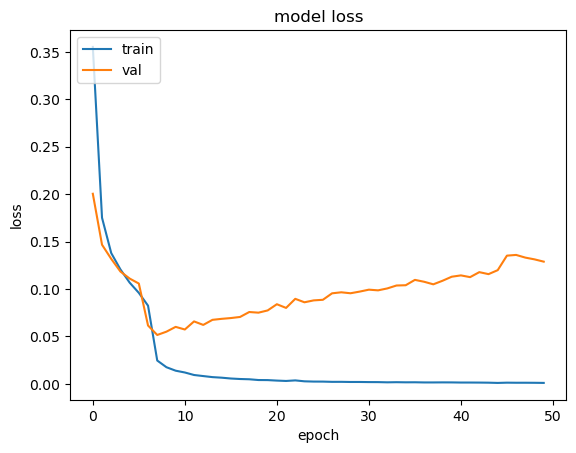

In [67]:
#Training the Model

num_epochs = 50
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

print(history.history.keys())

#Summary for Evaluation of Accuracy and Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
#Getting the weights of the embedded layers

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [69]:
#Embedding Vectors for representation of Data

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [70]:
#Testing the Model

testing = pd.read_csv('output_spam.csv')
testing = testing.drop(["Unnamed: 0"], axis = 1)
print(testing)

                                                 text
0   Feel Yourself That You Are Always Happy.. Slow...
1   staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                         Send me yetty's number pls.
3   Hey so this sat are we going for the intro pil...
4   I got it before the new year cos yetunde said ...
5   Hey we can go jazz power yoga hip hop kb and y...
6   Hey mate. Spoke to the mag people. We‰Û÷re on....
7                              Morning only i can ok.
8                                 Wat time Ì_ finish?
9               Shant disturb u anymore... Jia you...
10  4mths half price Orange line rental & latest c...
11  Your opinion about me? 1. Over 2. Jada 3. Kusr...
12  MOON has come to color your dreams, STARS to m...
13  You are a winner U have been specially selecte...
14  Unless it's a situation where YOU GO GURL woul...
15  Awww dat is sweet! We can think of something t...
16                            Bring tat cd don forget
17  Single line with a big m

In [71]:
#Putting the data into Array 

text = np.asanyarray(testing['text'])

In [72]:
# Creating the Sequence for Prediction
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(text)
test_data_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)      

classes = model.predict(test_data_padded)

1/1 [==============================] - 0s 49ms/step


In [73]:
#Prediction of Model if the Message is Spam or Ham
text_messages = (text)

print(text_messages) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(text_messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

#If the class number is closer to 1, then it is more likely a Spam
for x in range(len(text)):
  print(text[x])
  print(classes[x])
  print('\n')

['Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)'
 'staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323'
 "Send me yetty's number pls."
 'Hey so this sat are we going for the intro pilates only? Or the kickboxing too? '
 'I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.'
 'Hey we can go jazz power yoga hip hop kb and yogasana '
 'Hey mate. Spoke to the mag people. We‰Û÷re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. '
 'Morning only i can ok.' 'Wat time Ì_ finish?'
 'Shant disturb u anymore... Jia you...'
 '4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt'
 'Your opinion about me? 1. Over 2. Jada 3

In [74]:
#If-else statement to determine if Spam or Ham based on Class Value

classes_conv = ['spam' if x > 0.1 else 'ham' for x in classes]
prediction_test_out = pd.DataFrame(classes_conv, columns=['label']).to_csv("liangco_spam_output.csv", index=False)

#Outputting the Predicted Results in a CSV File
af = pd.read_csv('output.csv', encoding = 'latin-1')
print(af)

   label
0    ham
1    ham
2    ham
3    ham
4    ham
5    ham
6    ham
7    ham
8    ham
9    ham
10  spam
11   ham
12   ham
13  spam
14   ham
15   ham
16   ham
17   ham
18   ham
19   ham
